In [3]:
from gan.utils import *
from gan.gan import *
from gan.evaluation_utils import *
from gan.metrics import *
from matplotlib import pyplot as plt
import matplotlib as mpl
import tensorflow as tf
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Train and evaluate a SRGAN

In [4]:
NAME = 'L2'

## Achitecture Settings
N_RES = 7

## Optimization settings
DLR = 2.5e-7
GLR = 2e-6
BETA1 = 0.9

DLR2 = 1e-7
GLR2 = 1e-6

STEPS = 4 # number of G updates per D update

# Loss functions settings
GEN_REG = 5e-3
FEAT_REG = 1e-1

L1_REG = False
TV_REG = 0
VGG_REG = False

BATCH_SIZE = 50


Epoch: 0, Iter: 0, D: 0.5081, G:59.88


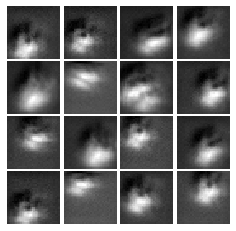

Epoch: 12, Iter: 50, D: 0.4986, G:13.14


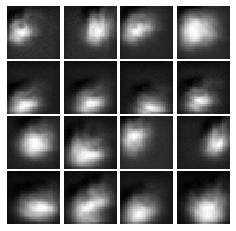

Epoch: 25, Iter: 100, D: 0.4904, G:13.46


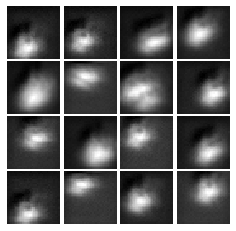

Epoch: 37, Iter: 150, D: 0.4827, G:13.16


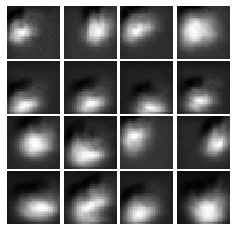

Final images


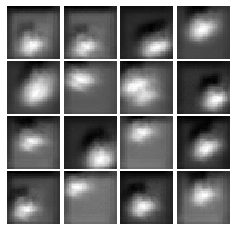

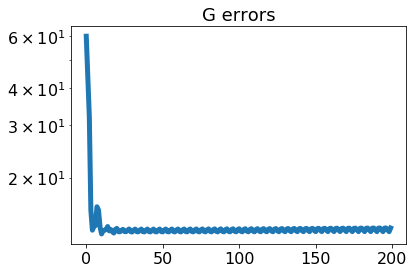

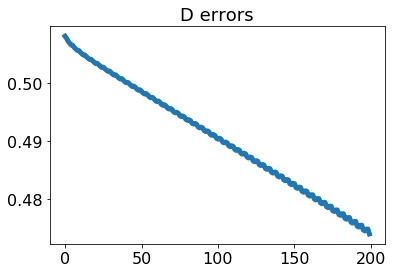

In [11]:
with tf.device("/device:GPU:2"):
    # Construct a SRGAN model
    srgan = SRGAN(N_RES) #Try 2

    # Use the function you wrote earlier to get optimizers for the Discriminator and the Generator
    D_solver, G_solver = get_solvers(dlr=DLR, glr=GLR, beta1=BETA1) #8e-7, 1.2e-7, 

    #Define loss object 
    #Constructor API
    # __init__(self, gen_reg, tv_reg, feat_reg, l1_reg=True, vgg_reg=False, 
    #                  ls_disc=False)
    losses = Loss(gen_reg=GEN_REG, tv_reg=TV_REG, l1_reg=L1_REG, feat_reg=FEAT_REG, vgg_reg=VGG_REG)
    validation_losses = Loss(gen_reg=GEN_REG, tv_reg=TV_REG,  l1_reg=L1_REG, feat_reg=FEAT_REG, vgg_reg=VGG_REG)

    # Run it!
    g_errors, d_errors  = run_a_gan(srgan, D_solver, G_solver, losses, validation_losses,
                                    num_epochs=50, batch_size=BATCH_SIZE, show_every=50,
                                    late_dlr=DLR2, late_glr=GLR2, 
                                    gen_steps_per_discrimination=STEPS,
                                   model_name=NAME)
plt.title('G errors')
plt.plot(g_errors)
plt.yscale('log')
plt.show()

plt.title('D errors')
plt.plot(d_errors)
plt.show()

## Run evaluation 

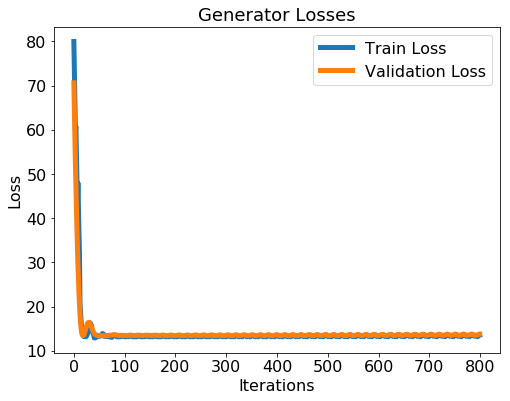

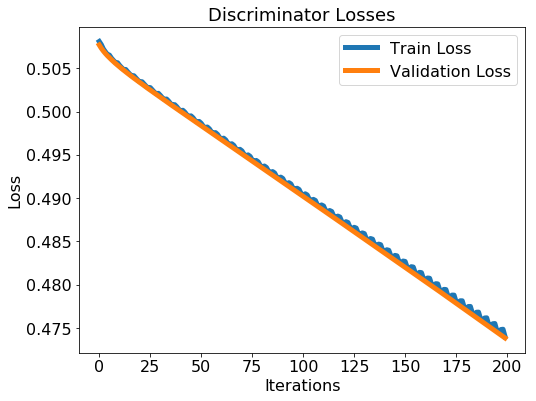

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,256,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul] name: conv2d_181/kernel/Initializer/random_uniform/mul/

In [12]:
plot_train_val_loss(losses, validation_losses, NAME)
p, s = runEvaluation(NAME)

In [ ]:
#Extract plots of losses as dictionary loss name -> loss plot
plots = losses.get_loss_plots()